In [5]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px 
from lets_plot import * # This imports all of ggplot2's functions
LetsPlot.setup_html()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reconnect to the SQLite database
conn = sqlite3.connect("D:/DE_final_projects/dataset/hotel_web.db")

# Load data into DataFrames
df_hotels = pd.read_sql("SELECT * FROM hotel_bookings", conn)
df_states = pd.read_sql("SELECT * FROM states", conn)
df_cities = pd.read_sql("SELECT * FROM cities", conn)

# Merge tables for meaningful analysis
df_hotels = df_hotels.merge(df_states, on="State_ID", how="left")
df_hotels = df_hotels.merge(df_cities, on="City_ID", how="left")

# Close connection
conn.close()




In [7]:
df_hotels=df_hotels.drop(columns=["State_ID", "City_ID"])
df_hotels.head()

,Hotel Name,Destination,Describe,Ratings,review_count,Actual Price,Offer Percentage,Price,State,City
0,Hotel O Sai President,Near Rawali Mandir,Good,3.5,453,3962,71,932,Uttar Pradesh,agra
1,Hotel O ASA AGRA,Plot number 1 Fatehabad road Plot number 1 Fat...,Excellent,4.5,275,2912,72,648,Uttar Pradesh,agra
2,Hotel O Salt And Pepper Hotel And Resturant,Near Prachin Pathwari Mandir,Good,3.5,137,4948,71,1137,Uttar Pradesh,agra
3,Hotel O KING PALACE,Near Fatehabad Road,Excellent,4.5,9,3378,71,797,Uttar Pradesh,agra
4,Hotel O 804621 Hotel Vintage House,1717 Fatehabad Road,Excellent,4.5,134,2912,70,702,Uttar Pradesh,agra


In [8]:
# 1. Top 10 Cities with Most Hotels
city_counts = df_hotels["City"].value_counts().head(10).reset_index()
city_counts.columns = ["City", "Hotel Count"]
fig1 = px.bar(city_counts, x="City", y="Hotel Count", title="Top 10 Cities with Most Hotels",
              text="Hotel Count", hover_data=["Hotel Count"], color="Hotel Count")
fig1.update_traces(textposition="outside")



In [10]:
# 3. Price Distribution of Hotels
fig3 = px.histogram(df_hotels, x="Price", nbins=20, title="Hotel Price Distribution",
                        hover_data=["Price"], color_discrete_sequence=["royalblue"])
fig3 


In [11]:

### 3. Sunburst Chart: Hotel Distribution by State and City
fig3 = px.sunburst(df_hotels, 
                   path=["State", "City"], 
                   title="Hotel Distribution by State and City",
                   color="State")
fig3.show()

In [12]:
fig1 = px.scatter_3d(df_hotels, 
                     x="Price", 
                     y="Ratings", 
                     z="review_count", 
                     color="State",
                     size="review_count",
                     hover_name="Hotel Name",
                     title="3D Scatter Plot: Hotel Price vs. Ratings vs. Review Count")
fig1.show()


In [13]:
state_counts = df_hotels["State"].value_counts().reset_index()
state_counts.columns = ["State", "Hotel Count"]
state_counts["Year"] = 2025  # Adding a dummy year for animation

fig2 = px.bar(state_counts, 
              x="State", 
              y="Hotel Count", 
              color="State", 
              animation_frame="Year",
              title="Animated Bar Chart: Hotel Growth by State")
fig2.show()


In [14]:
fig3 = px.treemap(df_hotels, 
                   path=["State", "City"], 
                   values="Price",  
                   color="State",
                   title="Treemap: Hotel Distribution by State and City")
fig3.show()

In [15]:
fig4 = px.scatter(df_hotels, 
                  x="Ratings", 
                  y="Price", 
                  size="review_count",
                  color="State",
                  title="Packed Bubble Chart: Hotel Prices",
                  hover_name="Hotel Name",
                  size_max=60)
fig4.show()

In [16]:
# Create a 'step' column for animation (simulate growth)
df_hotels["Step"] = pd.qcut(df_hotels["review_count"], q=10, labels=[str(i) for i in range(1, 11)])

# Animated Bubble Chart
fig = px.scatter(df_hotels, 
                 x="Ratings", 
                 y="Price", 
                 size="review_count",
                 color="State",
                 animation_frame="Step",
                 animation_group="Hotel Name",
                 title="Animated Packed Bubble Chart: Hotel Prices",
                 hover_name="Hotel Name",
                 size_max=60)

fig.show()


In [17]:
top_15_places = df_hotels.nlargest(15, 'Price')

In [18]:
(ggplot(top_15_places, aes(x='Hotel Name', y='Price', color='review_count', size='Ratings'))
     + geom_point(alpha=0.5)
     + ggtitle('Top 15 Most Expensive Hotels')
     + xlab('Hotel Name')
     + ylab('Price')
     + ggsize(1200, 600)  # Set the figure size: width=1000, height=600
     + theme(axis_text_x=element_text(angle=45, hjust=1),
             panel_background=element_rect(fill="lightcyan"),
             plot_background=element_rect(fill="lightpink"))
    )


In [19]:
import plotly.express as px

fig = px.scatter(
    df_hotels, 
    x="Price", 
    y="review_count", 
    size="Ratings", 
    color="Ratings",
    hover_data=["Hotel Name", "State", "City", "Actual Price", "Offer Percentage"],
    title="Price vs. Number of Reviews (Interactive Bubble Chart)"
)

fig.show()

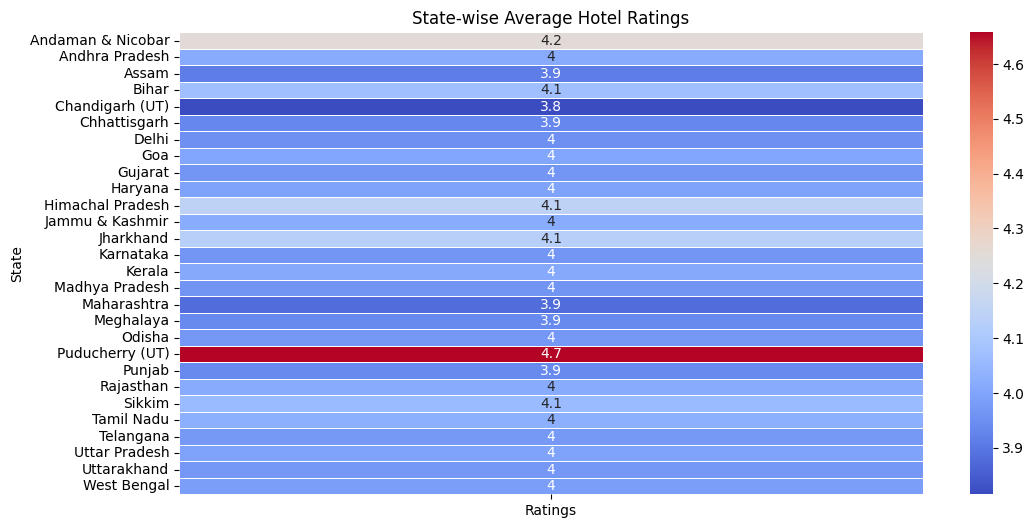

In [20]:
# Figure 4: State-wise Average Rating (Heatmap)
state_ratings = df_hotels.groupby("State")["Ratings"].mean().reset_index()

plt.figure(figsize=(12, 6))
heatmap_data = state_ratings.pivot_table(values="Ratings", index="State")

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("State-wise Average Hotel Ratings")
plt.xlabel("")
plt.ylabel("State")
plt.show()


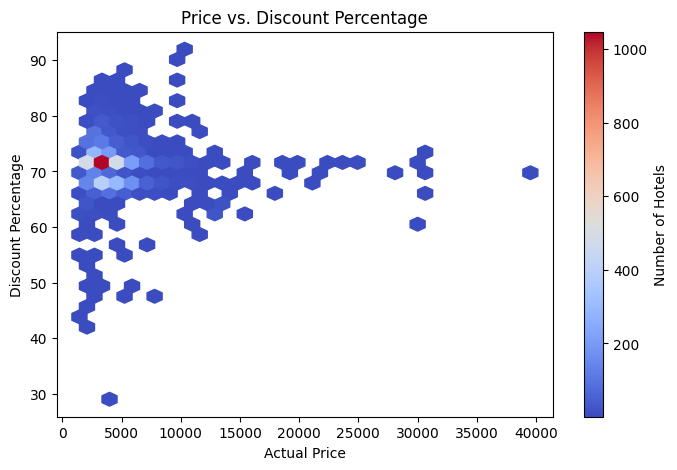

In [21]:
plt.figure(figsize=(8, 5))
plt.hexbin(df_hotels["Actual Price"], df_hotels["Offer Percentage"], gridsize=30, cmap="coolwarm", mincnt=1)
plt.colorbar(label="Number of Hotels")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.title("Price vs. Discount Percentage")
plt.show()

In [22]:
(ggplot(df_hotels , aes(x='State', y='Price')) +
      geom_boxplot(fill='orange', color='black', tooltips=layer_tooltips().line('@Price')) +
      ggtitle("Price Distribution by State") +
      theme_minimal() +
      coord_flip())

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px

In [24]:
# Define price range bins and labels
bins = [0, 1000, 3000, 6000, np.inf]
labels = ["Budget (<₹1000)", "Mid-range (₹1000-₹3000)", "Premium (₹3000-₹6000)", "Luxury (>₹6000)"]

# Create a new column for price category
df_hotels["Price Category"] = pd.cut(df_hotels["Price"], bins=bins, labels=labels, right=False)

# Count hotels in each price category
price_counts = df_hotels["Price Category"].value_counts().reset_index()
price_counts.columns = ["Price Category", "Hotel Count"]

# Create a donut chart with tooltips
fig = px.pie(
    price_counts,
    names="Price Category",
    values="Hotel Count",
    hole=0.4,
    title="Hotels Segmented by Price Range",
    hover_data={"Hotel Count": True},  # Tooltip fix
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Show the interactive chart
fig.show()